<a href="https://colab.research.google.com/github/sspaulc/TAXI-MOBILITY-SURGE-PRICE-PREDICTION/blob/main/SANCHITA_Taxi_Price_Surge_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data provided by an Indian cab aggregator service Sigma Cabs. Their customers can download their app on smartphones and book a cab from anywhere in the cities they operate in. They, in turn, search for cabs from various service providers and provide the best option to their clients across available options. They have been in operation for a little less than a year now. During this period, they have captured surge pricing types from the service providers.
The main objective is to build a predictive model, which could help them in predicting the surge pricing type proactively. This would in turn help them in matching the right cabs with the right customers quickly and efficiently.
Trip_ID: ID for TRIP

Trip_Distance: The distance for the trip requested by the customer

TypeofCab: Category of the cab requested by the customer

CustomerSinceMonths: Customer using cab services since n months; 0 month means the current month

LifeStyleIndex: Proprietary index created by Sigma Cabs showing the lifestyle of the customer based on their behaviour

ConfidenceLifeStyle_Index: Category showing confidence on the index mentioned above

Destination_Type: Sigma Cabs divides any destination into one of the 14 categories.

Customer_Rating: Average of lifetime ratings of the customer till date

CancellationLast1Month: Number of trips cancelled by the customer in last 1 month

Var1, Var2 and Var3: Continuous variables masked by the company. Can be used for modelling purposes

Gender: Gender of the customer

SurgePricingType: Target (can be of 3 types) - DV

In [1]:
import numpy as np

import pandas as pd

In [2]:
#Accessing the data

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data= pd.read_csv("/content/gdrive/MyDrive/AlmaBetter/Almabetter/Capstone Projects/Taxi Mobility Surge Price Prediction/data_sigma_cabs.csv")

Performing EDA to understand the data better.

In [4]:
import matplotlib.pyplot as plt


In [5]:
#information on null values

import missingno as msno
%matplotlib inline

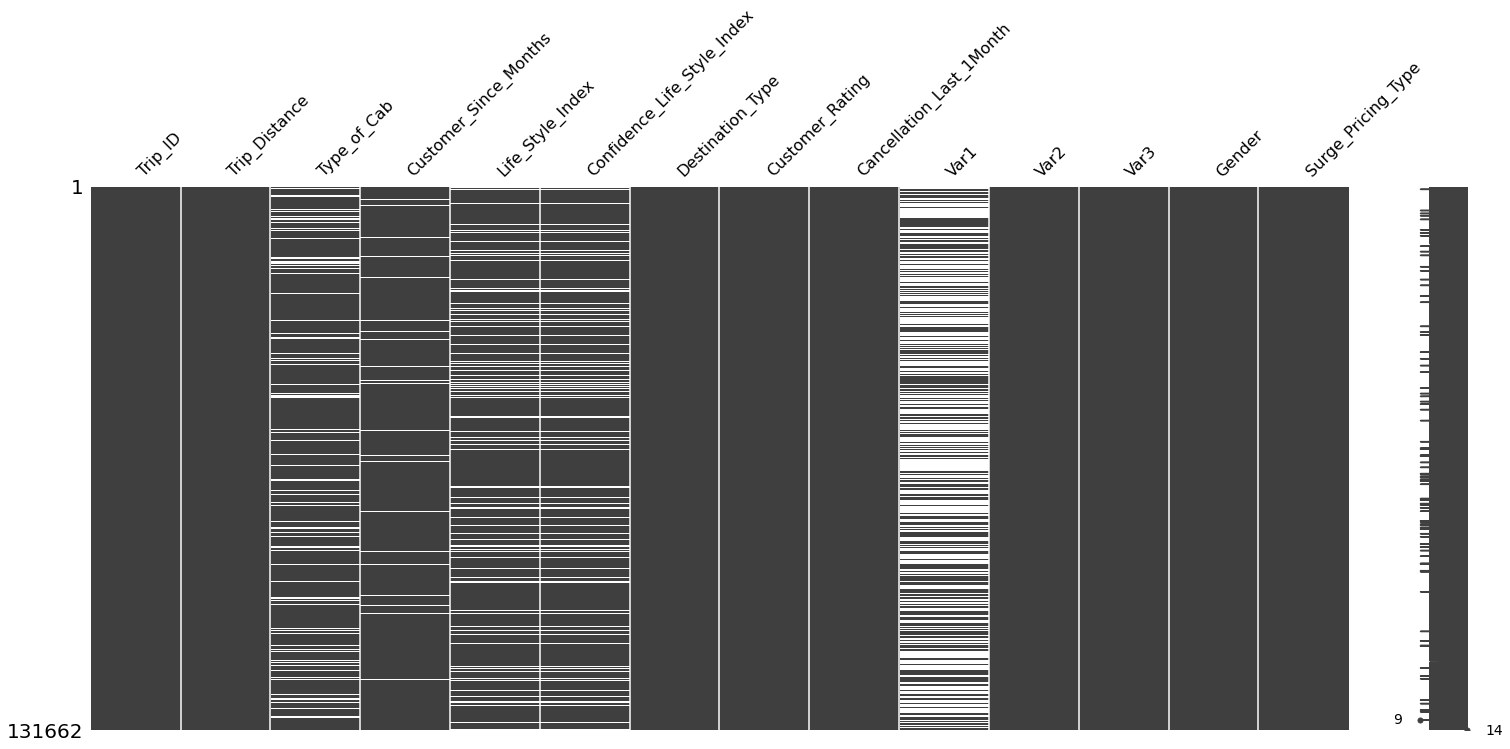

In [6]:
msno.matrix(data)

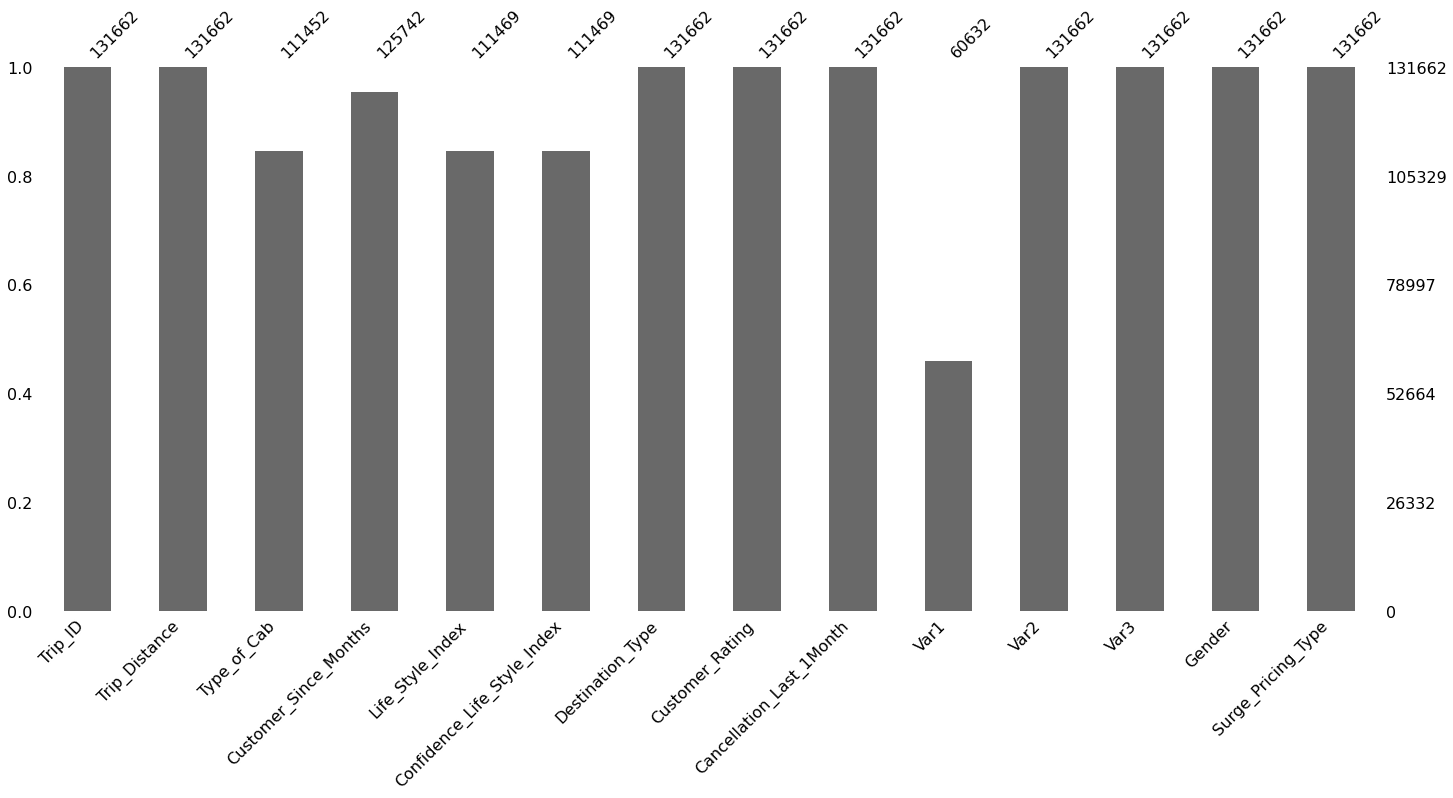

In [7]:
msno.bar(data)

Looking at the correlation heat map to understand the correlation between variables wrt surge pricing.

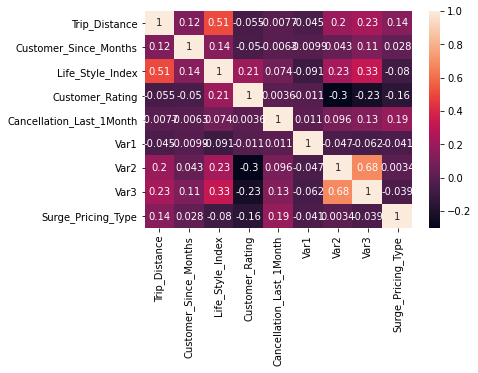

In [8]:
import seaborn as sns

sns.heatmap(data.corr(),annot= True)

#Data Cleaning.

Columns to drop:

1. Trip Id- this is unique for every observation and this doesn't effect our analysis much.

2. Var 1- more than 40% of the column values are null with very low correlation with the surge price

In [9]:
#Dropping not needed columns

data.drop(columns=['Trip_ID','Var1'],inplace= True)

In [10]:
data.describe()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Surge_Pricing_Type
count,131662.000000,125742.000000,111469.000000,131662.000000,131662.000000,131662.000000,131662.000000,131662.000000
mean,44.200909,6.016661,2.802064,2.849458,0.782838,51.202800,75.099019,2.155747
std,25.522882,3.626887,0.225796,0.980675,1.037559,4.986142,11.578278,0.738164
min,0.310000,0.000000,1.596380,0.001250,0.000000,40.000000,52.000000,1.000000
25%,24.580000,3.000000,2.654730,2.152500,0.000000,48.000000,67.000000,2.000000
50%,38.200000,6.000000,2.798050,2.895000,0.000000,50.000000,74.000000,2.000000
75%,60.730000,10.000000,2.946780,3.582500,1.000000,54.000000,82.000000,3.000000
max,109.230000,10.000000,4.875110,5.000000,8.000000,124.000000,206.000000,3.000000


In [11]:
data.head(3)

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,46,60,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,56,78,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,56,77,Male,2


In [12]:
#I'll try to understand the lifestyle index better
data['Life_Style_Index'].describe()

count    111469.000000
mean          2.802064
std           0.225796
min           1.596380
25%           2.654730
50%           2.798050
75%           2.946780
max           4.875110
Name: Life_Style_Index, dtype: float64

In [13]:
#To put them as categorical values to understand which lifestyle has most effect in price surge

def lifestyle(x):
  if x>2.9:
     return 'high'
  elif x<=2.9 and x>2.6:
    return 'medium'
  else:
    return 'low'


In [14]:
data['Life_Style_Category']= data['Life_Style_Index'].apply(lifestyle)

Text(0.5, 1.0, ' Category the Life Style lies in')

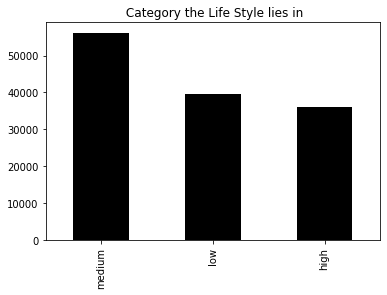

In [15]:
data['Life_Style_Category'].value_counts().plot(kind='bar',color= 'black')

plt.title(' Category the Life Style lies in')

Most of the life style of the customers lie in the medium kind of lifestyle.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_Distance                131662 non-null  float64
 1   Type_of_Cab                  111452 non-null  object 
 2   Customer_Since_Months        125742 non-null  float64
 3   Life_Style_Index             111469 non-null  float64
 4   Confidence_Life_Style_Index  111469 non-null  object 
 5   Destination_Type             131662 non-null  object 
 6   Customer_Rating              131662 non-null  float64
 7   Cancellation_Last_1Month     131662 non-null  int64  
 8   Var2                         131662 non-null  int64  
 9   Var3                         131662 non-null  int64  
 10  Gender                       131662 non-null  object 
 11  Surge_Pricing_Type           131662 non-null  int64  
 12  Life_Style_Category          131662 non-null  object 
dtyp

In [17]:
#Dropping nan values for simplicity sake

data_copy= data.copy()

data.dropna(subset = ['Type_of_Cab', 'Customer_Since_Months', 'Confidence_Life_Style_Index','Life_Style_Index'],inplace= True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Trip_Distance                90052 non-null  float64
 1   Type_of_Cab                  90052 non-null  object 
 2   Customer_Since_Months        90052 non-null  float64
 3   Life_Style_Index             90052 non-null  float64
 4   Confidence_Life_Style_Index  90052 non-null  object 
 5   Destination_Type             90052 non-null  object 
 6   Customer_Rating              90052 non-null  float64
 7   Cancellation_Last_1Month     90052 non-null  int64  
 8   Var2                         90052 non-null  int64  
 9   Var3                         90052 non-null  int64  
 10  Gender                       90052 non-null  object 
 11  Surge_Pricing_Type           90052 non-null  int64  
 12  Life_Style_Category          90052 non-null  object 
dtypes: float64(4), 

Text(0.5, 1.0, 'Customer Since Months')

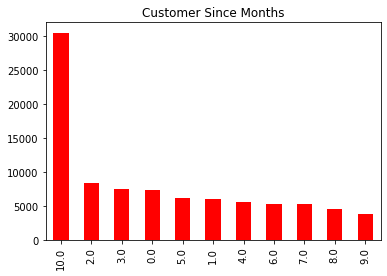

In [19]:
data['Customer_Since_Months'].value_counts().plot(kind='bar',color='red')

plt.title('Customer Since Months')

Most of the customers have been customers for 10 months or more.

Most customers have had a positive experience to have been customer for such a long time.

Text(0.5, 1.0, 'Cancellation in Last 1 Month')

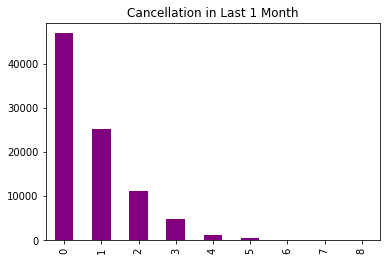

In [20]:
data['Cancellation_Last_1Month'].value_counts().plot(kind='bar',color='purple')

plt.title('Cancellation in Last 1 Month')

Most customers have made 0 or 1 cancellations mostly in the last month.

Let us understand the trip distance distribution:

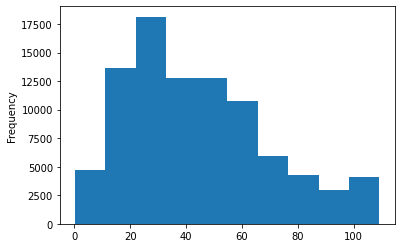

In [21]:
data['Trip_Distance'].plot(kind='hist')

Type of cab with surge price:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


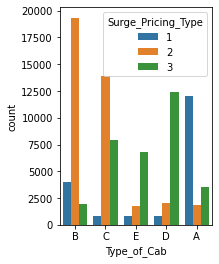

In [22]:
plt.subplot(1,2,2)
sns.countplot(data['Type_of_Cab'],hue=data['Surge_Pricing_Type'])

Looking for categorical values in the type of cab column.

In [23]:
data['Type_of_Cab'].value_counts()

B    25259
C    22692
A    17407
D    15300
E     9394
Name: Type_of_Cab, dtype: int64

In [24]:
labels = data['Type_of_Cab'].unique()

In [25]:
labels

array(['B', 'C', 'E', 'D', 'A'], dtype=object)

([<matplotlib.patches.Wedge at 0x7f411eee5410>,
 [Text(0.6998515085598419, 0.8486506147800246, 'B'),
  Text(-0.9155270364751454, 0.6097624500434886, 'C'),
  Text(-0.7573689921060944, -0.7977419443630871, 'E'),
  Text(0.40963406957967485, -1.0208819368759516, 'D'),
  Text(1.0414555176892097, -0.3540768344225587, 'A')],
 [Text(0.38173718648718646, 0.4629003353345588, '28.0%'),
  Text(-0.49937838353189745, 0.332597700023721, '25.2%'),
  Text(-0.4131103593305969, -0.43513196965259293, '19.3%'),
  Text(0.2234367652252772, -0.556844692841428, '17.0%'),
  Text(0.5680666460122962, -0.1931328187759411, '10.4%')])

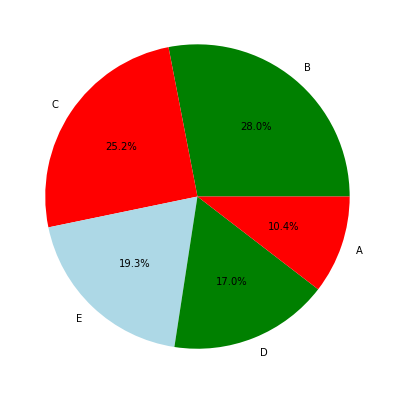

In [26]:
# Data to plot (#Final code for pie chart)
labels = data['Type_of_Cab'].unique()
sizes = data['Type_of_Cab'].value_counts()
colors = ['green', 'red', 'lightblue']

# Plot
fig = plt.figure(figsize =(10, 7))
plt.pie(sizes,labels=labels, colors=colors,autopct='%1.1f%%')


If we understand this pie chart-

1. The most popular types of cabs are B,C and E


#Coverting categorical columns to numerical values

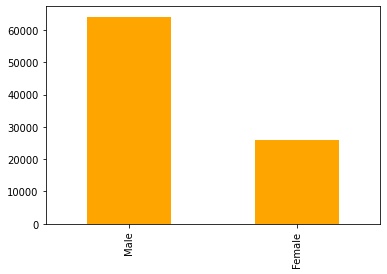

In [27]:
data['Gender'].value_counts().plot(kind='bar',color= 'orange')

In [28]:
#converting gender to 0 and 1

data['Gender']=data['Gender'].map({'Female':0, 'Male':1})

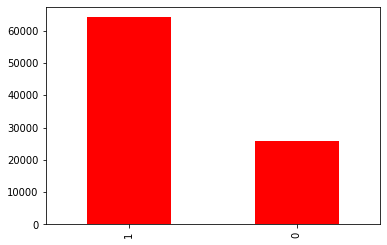

In [29]:
data['Gender'].value_counts().plot(kind= 'bar', color= 'red')

In [30]:
#I don't need Life Style Category anymore so dropping it

data.drop(columns= 'Life_Style_Category',inplace= True)

In [31]:
#One hot encoding on all the categorical columns

# One hot encoding
data= pd.get_dummies(data, columns=["Type_of_Cab", "Confidence_Life_Style_Index","Destination_Type"], prefix=["cab_type", "confidence_index","destination_type"],drop_first=True)

I am not using label encoding on these categorical columns because I want my model to be robust and be able to deal with data even in the future
and I do not want to assume proportions for the future.

In [32]:
data.head(5)

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var2,Var3,Gender,Surge_Pricing_Type,cab_type_B,cab_type_C,cab_type_D,cab_type_E,confidence_index_B,confidence_index_C,destination_type_B,destination_type_C,destination_type_D,destination_type_E,destination_type_F,destination_type_G,destination_type_H,destination_type_I,destination_type_J,destination_type_K,destination_type_L,destination_type_M,destination_type_N
0,6.77,1.0,2.42769,3.9050,0,46,60,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.4500,0,56,78,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,54.95,10.0,3.03453,3.4025,4,49,102,1,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,29.72,10.0,2.83958,2.9750,1,50,75,1,2,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
7,18.44,2.0,2.81871,3.5825,0,46,63,1,2,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90052 entries, 0 to 131661
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Trip_Distance             90052 non-null  float64
 1   Customer_Since_Months     90052 non-null  float64
 2   Life_Style_Index          90052 non-null  float64
 3   Customer_Rating           90052 non-null  float64
 4   Cancellation_Last_1Month  90052 non-null  int64  
 5   Var2                      90052 non-null  int64  
 6   Var3                      90052 non-null  int64  
 7   Gender                    90052 non-null  int64  
 8   Surge_Pricing_Type        90052 non-null  int64  
 9   cab_type_B                90052 non-null  uint8  
 10  cab_type_C                90052 non-null  uint8  
 11  cab_type_D                90052 non-null  uint8  
 12  cab_type_E                90052 non-null  uint8  
 13  confidence_index_B        90052 non-null  uint8  
 14  confi

#Feature Selection:

In [34]:
num_variables=['Trip_Distance','Customer_Since_Months','Life_Style_Index','Customer_Rating','Var2','Var3']

In [35]:
numerical_features=data[num_variables]

In [36]:
categorical_features=data[[col for col in data.columns if col not in num_variables]]

In [37]:
categorical_features.columns

Index(['Cancellation_Last_1Month', 'Gender', 'Surge_Pricing_Type',
       'cab_type_B', 'cab_type_C', 'cab_type_D', 'cab_type_E',
       'confidence_index_B', 'confidence_index_C', 'destination_type_B',
       'destination_type_C', 'destination_type_D', 'destination_type_E',
       'destination_type_F', 'destination_type_G', 'destination_type_H',
       'destination_type_I', 'destination_type_J', 'destination_type_K',
       'destination_type_L', 'destination_type_M', 'destination_type_N'],
      dtype='object')

In [38]:
categorical_features.drop(columns='Surge_Pricing_Type',inplace= True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
categorical_features.columns

Index(['Cancellation_Last_1Month', 'Gender', 'cab_type_B', 'cab_type_C',
       'cab_type_D', 'cab_type_E', 'confidence_index_B', 'confidence_index_C',
       'destination_type_B', 'destination_type_C', 'destination_type_D',
       'destination_type_E', 'destination_type_F', 'destination_type_G',
       'destination_type_H', 'destination_type_I', 'destination_type_J',
       'destination_type_K', 'destination_type_L', 'destination_type_M',
       'destination_type_N'],
      dtype='object')

##Feature selection for categorical input that has categorical output: Chi-Squared

H0- Categorical features are independent from the surge pricing category

H1- Categorical features are dependent on the surge pricing category

The significance level remains 5% for this.

In [40]:
from sklearn.feature_selection import chi2

In [41]:
#Defining the dependent variable

In [42]:
dependent_variable= data['Surge_Pricing_Type']

In [43]:
#Checking the Chi-scores array

chi_scores = chi2(categorical_features,dependent_variable)

In [44]:
chi_scores

(array([4.36905234e+03, 4.13094377e-02, 1.24757739e+04, 4.87004575e+03,
        1.32863060e+04, 5.24532842e+03, 2.02580837e+03, 3.76378137e+01,
        1.34049001e+03, 3.15790920e+01, 5.07458511e+02, 1.20325710e+02,
        1.97456132e+02, 1.56033130e+02, 5.68496944e+01, 9.86709681e+01,
        4.45941173e+01, 1.11212377e+01, 3.30281828e+01, 6.19917879e+00,
        2.75409033e+01]),
 array([0.00000000e+000, 9.79557129e-001, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 6.71510176e-009,
        8.24694780e-292, 1.38895221e-007, 6.40891394e-111, 7.44053211e-027,
        1.32722836e-043, 1.31170540e-034, 4.52111667e-013, 3.74862083e-022,
        2.07257597e-010, 3.84639540e-003, 6.73009568e-008, 4.50677037e-002,
        1.04608948e-006]))

The first array in this array contains chi-square values and the second contains p-values

For our feature selection we should take p-values.

In [45]:
p_values = pd.Series(chi_scores[1],index = categorical_features.columns)
p_values.sort_values(ascending = False , inplace = True)

Text(0.5, 1.0, 'P-values for categorical features')

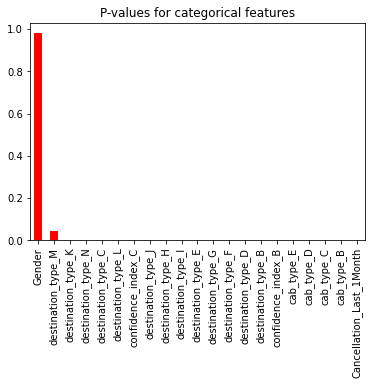

In [46]:
p_values.plot(kind='bar',color='red')

plt.title('P-values for categorical features')

p-value of gender is very high which means that this variable is independent of the surge pricing and therefore should not be used for model training.

##Feature selection for numerical input that has categorical output: ANOVA

In [47]:
from sklearn.feature_selection import f_classif, f_regression

In [49]:
#Calculating the f scores of these

In [48]:
f_scores = f_classif(numerical_features, dependent_variable)
f_scores

(array([1217.74688847,   48.41793297,  486.43036071, 1060.66928714,
          26.94158871,  130.88211635]),
 array([0.00000000e+000, 9.63068149e-022, 7.56808447e-211, 0.00000000e+000,
        2.00870411e-012, 1.74211047e-057]))

In [49]:
#The second array consists of p-values that we need

p_values_n= pd.Series(f_scores[1],index= numerical_features.columns)

Text(0.5, 1.0, 'P-values for numerical features')

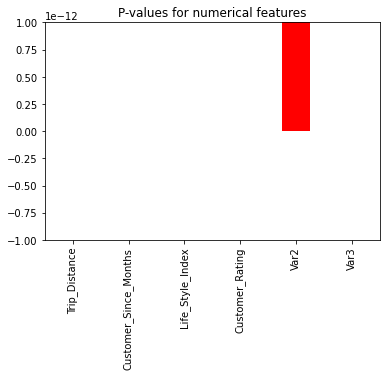

In [50]:
p_values_n.plot(kind='bar',color='red')

plt.title('P-values for numerical features')

We can drop Variable 2 because of high p-value too.

Implementing train-test split:

In [51]:
X=data[[col for col in data.columns if col not in ['Surge_Pricing_Type','Gender','Var2']]]
Y=data['Surge_Pricing_Type']

In [52]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [53]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.25, random_state=42)

#Implementing RandomForrestClassifier:

Standardizing is not needed while using Random Classifier for tree based classifier: But I don't want to take a risk so I will still scale it.

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
X_train.shape

(67539, 25)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

#Metric scores:

In [58]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,plot_confusion_matrix,roc_auc_score

In [59]:
# make predictions for test data
y_pred = classifier.predict(X_test)

In [60]:
# Training accuracy
accuracy_score(y_train, classifier.predict(X_train))*100

98.31060572410016

In [61]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 70.53%


Average:This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

'micro':
Calculate metrics globally by counting the total true positives, false negatives and false positives.

'macro':
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

'weighted':
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters ‘macro’ to account for label imbalance; it can result in an F-score that is not between precision and recall.

We cannot use binary for multiclass label problem.


In [62]:
print("Precision:", precision_score(y_test,y_pred,average='macro')*100)

Precision: 70.8734388313724


In [63]:
print("Recall:",recall_score(y_test,y_pred,average='macro')*100)

Recall: 68.55550216636578


Plotting the confusion matrix:

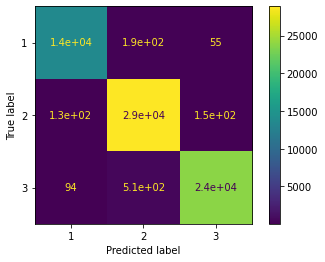

In [64]:
#For train
plot_confusion_matrix(classifier,X_train,y_train)

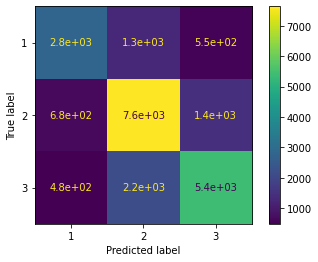

In [65]:
#For test
plot_confusion_matrix(classifier,X_test,y_test)

#Using hyperparamter tuning by Randomized Search Cv:

In [66]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
              

In [67]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

In [69]:
#Random search
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=2,cv=5)

In [70]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   3.6s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   3.7s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   3.6s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   3.6s
[CV] n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8 
[CV]  n_estimators=80, min_samples_split=150, min_samples_leaf=50, max_depth=8, total=   3.6s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=4, total=   2.3s
[CV] n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=80, min_samples_split=50, min_samples_leaf=40, max_depth=4, total=   2.3s
[CV] n_estimators=80, min_samples_split=50, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [71]:
#The best esitmators
rf_random.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=40, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
#Building optimal model on the best estimators
rf_optimal_model = rf_random.best_estimator_

In [73]:
# make predictions for test data
y_pred_r = rf_optimal_model.predict(X_test)

In [74]:
# Training accuracy
accuracy_score(y_train, rf_optimal_model.predict(X_train))*100

72.87789277306446

In [75]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_r)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.61%


In [76]:
print("Precision:", precision_score(y_test,y_pred_r,average='macro')*100)

Precision: 74.02167316587244


In [77]:
print("Recall:",recall_score(y_test,y_pred_r,average='macro')*100)

Recall: 69.7613152084226


##After tuning the hyper paramters the overfitting on training data stopped since this is also a cross validation method.

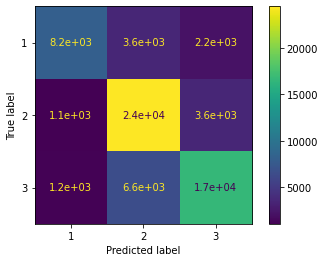

In [82]:
#For train
plot_confusion_matrix(rf_optimal_model,X_train,y_train)

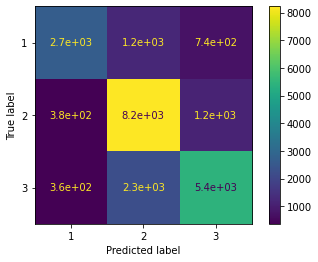

In [83]:
#For test
plot_confusion_matrix(rf_optimal_model,X_test,y_test)

##Implementing SHAP Values:

In [84]:
!pip install shap

In [85]:
import shap

# Need to load JS vis in the notebook
shap.initjs()

Separate x and y values so that I don't miss out on older information:

In [78]:
x=data[[col for col in data.columns if col not in ['Surge_Pricing_Type','Gender','Var2']]]
y=data['Surge_Pricing_Type']

In [79]:
x.columns

Index(['Trip_Distance', 'Customer_Since_Months', 'Life_Style_Index',
       'Customer_Rating', 'Cancellation_Last_1Month', 'Var3', 'cab_type_B',
       'cab_type_C', 'cab_type_D', 'cab_type_E', 'confidence_index_B',
       'confidence_index_C', 'destination_type_B', 'destination_type_C',
       'destination_type_D', 'destination_type_E', 'destination_type_F',
       'destination_type_G', 'destination_type_H', 'destination_type_I',
       'destination_type_J', 'destination_type_K', 'destination_type_L',
       'destination_type_M', 'destination_type_N'],
      dtype='object')

In [85]:
# creating the training and validation set
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x, y, test_size=.25, random_state=42)


In [ ]:
rf_explainer = shap.TreeExplainer(classifier)
shap_values_rf = rf_explainer.shap_values(x_train_new)

In [ ]:
shap.summary_plot(shap_values_rf[1], features=x_train_new, feature_names=x_train_new.columns)

In [80]:
x= x.drop(columns=['Customer_Since_Months','destination_type_N','destination_type_M','destination_type_C','destination_type_D','destination_type_E','destination_type_F','destination_type_G','destination_type_H'])

In [81]:
#train test split for x again 

x_train,x_test= train_test_split(x,test_size= 0.25,random_state=42)

In [82]:
x_train.shape

(67539, 16)

##Hyper_parameter tuning after Shap values:

In [86]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

#Average parameters
#avg= [None,'micro','macro','samples','weighted']

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [87]:
# Create an instance of the RandomForestClassifier
rf_model_shap = RandomForestClassifier()

In [88]:
#Random search
rf_random_shap = RandomizedSearchCV(rf_model_shap,param_dict,verbose=2,cv=5)

In [89]:
rf_random_shap.fit(x_train,y_train_new)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   1.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   2.0s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   1.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   1.9s
[CV] n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=150, min_samples_leaf=50, max_depth=6, total=   1.9s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   1.5s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=4 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=4, total=   1.4s
[CV] n_estimators=50, min_samples_split=1

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [90]:
#Building optimal model on the best estimators
rf_optimal_model_shap = rf_random_shap.best_estimator_

In [91]:
# make predictions for test data
y_pred_r_shap = rf_optimal_model_shap.predict(x_test)

In [92]:
# Training accuracy
accuracy_score(y_train_new, rf_optimal_model_shap.predict(x_train))*100

72.7431558062749

In [93]:
# evaluate predictions
accuracy = accuracy_score(y_test_new, y_pred_r_shap)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.53%


In [94]:
print("Precision:", precision_score(y_test_new,y_pred_r_shap,average='macro')*100)

Precision: 73.66185218530352


#XGBoost:

In [95]:
from xgboost import XGBClassifier

In [96]:
# Fitting Xtreme Gradient Classification to the Training set
xgbclassifier = XGBClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
xgbclassifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='entropy',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

##Metric scores:

In [97]:
# make predictions for test data
y_pred_x = xgbclassifier.predict(X_test)

In [98]:
# Training accuracy
accuracy_score(y_train, classifier.predict(X_train))*100

98.31060572410016

In [99]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_x)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.55%


In [100]:
print("Precision:", precision_score(y_test,y_pred_x,average='macro')*100)

Precision: 72.19403845212905


##Hyperparameter tuning: Randomized Search CV

In [101]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

# Create an instance of the XGBoost
xgb_model = XGBClassifier(learning_rate=0.1,objective='multi:softmax')

#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)


xgb_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=  13.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=  13.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=  13.3s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=  13.2s
[CV] n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6 
[CV]  n_estimators=50, min_samples_split=100, min_samples_leaf=50, max_depth=6, total=  13.2s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=  16.1s
[CV] n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4 
[CV]  n_estimators=100, min_samples_split=100, min_samples_leaf=40, max_depth=4, total=  16.2s
[CV] n_estimators=100, min_samples_sp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 14.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softmax',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depr

In [102]:
#The best esitmators
xgb_random.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, min_samples_leaf=50, min_samples_split=150,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [103]:
#Building optimal model on the best estimators
xgb_optimal_model = xgb_random.best_estimator_

In [104]:
# make predictions for test data
y_pred_rx = xgb_optimal_model.predict(X_test)

##Metrics for scoring:

In [105]:
# Training accuracy
accuracy_score(y_train, xgb_optimal_model.predict(X_train))*100

74.79678408030915

In [106]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_rx)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print("Precision:", precision_score(y_test,y_pred_rx,average='macro')*100)

print("Recall:",recall_score(y_test,y_pred_rx,average='macro')*100)

Accuracy: 73.26%
Precision: 74.28117681537243
Recall: 70.92069911578702


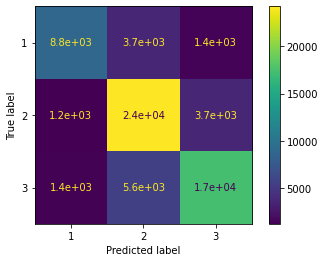

In [107]:
#For train
plot_confusion_matrix(xgb_optimal_model,X_train,y_train)

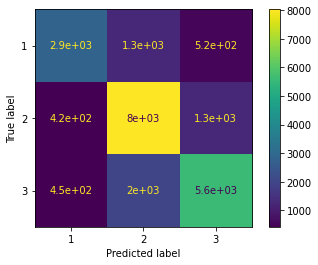

In [108]:
#For test
plot_confusion_matrix(xgb_optimal_model,X_test,y_test)

#Adaboost:

In [109]:
#import library

from sklearn.ensemble import AdaBoostClassifier

In [110]:
# Fitting Adaboost Classification to the Training set
adbclassifier = AdaBoostClassifier(n_estimators = 50, random_state = 42)
adbclassifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=42)

In [111]:
# make predictions for test data
y_pred_a = adbclassifier.predict(X_test)

In [112]:
# Training accuracy
accuracy_score(y_train, adbclassifier.predict(X_train))*100

72.21605294718607

In [113]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_a)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 72.01%


#**After using various boosting,tree based algorithms with hyper parameter tuning and feature selection, the maximum accuracy I have been able to evaulate accuracy is at 73%,Precision at 74% and Recall at 70%**

##Personally, I feel this is due to 3 reasons:

1. Too big data set

2. Features aren't too relevant

3. No proper pattern